In [1]:
print("Hello wine!")

Hello wine!


In [2]:
import pandas as pd

df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.drop(columns=['Unnamed: 0'])
df
df.columns.shape

(13,)

In [3]:
print(df.country.value_counts().shape)
df.country.value_counts()

(43,)


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [4]:
print(df.designation.value_counts().shape)
df.designation.value_counts()

(37979,)


Reserve                                2009
Estate                                 1322
Reserva                                1259
Riserva                                 698
Estate Grown                            621
                                       ... 
Château de Nevers                         1
Amaya Ridge Vineyard                      1
Millesimato Brut Rive di Refrontolo       1
Timber Crest Vineyard Estate Grown        1
Drink & Dream D+D                         1
Name: designation, Length: 37979, dtype: int64

In [5]:
df.points.value_counts().sort_values()

100       19
99        33
98        77
97       229
80       397
96       523
81       692
95      1535
82      1836
83      3025
94      3758
84      6480
93      6489
85      9530
92      9613
91     11359
89     12226
86     12600
90     15410
87     16933
88     17207
Name: points, dtype: int64

In [6]:
print(df.price.value_counts().shape)
print(df.price.min())
print(df.price.max())

(390,)
4.0
3300.0


In [7]:
df.province.value_counts()

California      36247
Washington       8639
Bordeaux         5941
Tuscany          5897
Oregon           5373
                ...  
Viile Timis         1
Gladstone           1
Rhode Island        1
Paardeberg          1
Dingač              1
Name: province, Length: 425, dtype: int64

In [8]:
df.region_1.value_counts()

Napa Valley                    4480
Columbia Valley (WA)           4124
Russian River Valley           3091
California                     2629
Paso Robles                    2350
                               ... 
Collioure                         1
Cacc’e Mmitte di Lucera           1
Currency Creek                    1
Currency Creek-McLaren Vale       1
Southern Flinders Ranges          1
Name: region_1, Length: 1229, dtype: int64

In [9]:
df.region_2.value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [10]:
df.taster_name.value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [11]:
df.title.value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)         11
Korbel NV Brut Sparkling (California)                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                     8
Ruinart NV Brut Rosé  (Champagne)                               7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)            7
                                                               ..
Domaine de Gournier 2013 Grenache (Cévennes)                    1
Enoport 2014 Novo Mondo Red (Douro)                             1
V. Sattui 2012 Cabernet Sauvignon (Mount Veeder)                1
Buehler 2014 Estate Cabernet Sauvignon (Napa Valley)            1
Dr. Heyden 2005 Oppenheimer Kabinett Riesling (Rheinhessen)     1
Name: title, Length: 118840, dtype: int64

In [12]:
df.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Caprettone                      1
Athiri                          1
Cococciola                      1
Roscetto                        1
Thrapsathiri                    1
Name: variety, Length: 707, dtype: int64

In [13]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


             price
points            
100     485.947368
99      284.214286
98      245.492754
97      207.173913
96      159.292531
95      109.235420
94       81.436938
93       63.112216
92       51.037763
91       43.224252
90       36.906622
89       32.169640
88       28.687523
87       24.901884
86       22.133759
85       19.949562
84       19.310215
83       18.237353
82       18.870767
81       17.182353
80       16.372152


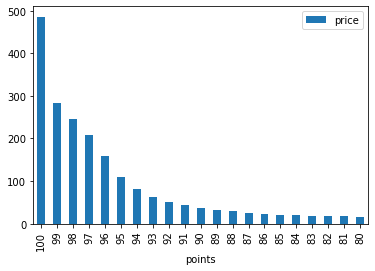

In [14]:
import matplotlib.pyplot as plt
groupedByPoints = df.groupby("points").mean().sort_values("points", ascending=False)
print(groupedByPoints)
groupedByPoints.plot(kind = "bar")

           points
price            
3300.0  88.000000
2500.0  96.000000
2013.0  91.000000
2000.0  96.500000
1900.0  98.000000
...           ...
8.0     84.628924
7.0     84.450346
6.0     84.341667
5.0     83.586957
4.0     84.272727

[390 rows x 1 columns]


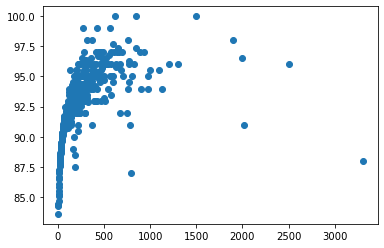

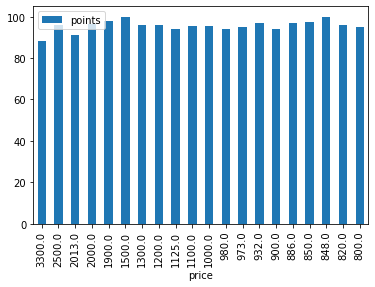

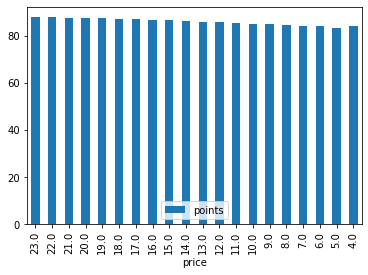

In [15]:
groupedByPrice = df.groupby("price").mean().sort_values("price", ascending=False)
print(groupedByPrice)
plt.scatter(groupedByPrice.index, groupedByPrice.points)
groupedByPrice.head(20).plot(kind = "bar")
groupedByPrice.tail(20).plot(kind = "bar")

In [16]:
df.sort_values("points", ascending=False).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
114972,Portugal,"A powerful and ripe wine, strongly influenced ...",Nacional Vintage,100,650.0,Port,NaN,NaN,Roger Voss,@vossroger,Quinta do Noval 2011 Nacional Vintage (Port),Port,Quinta do Noval
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse
118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,100,450.0,California,Sonoma County,Sonoma,NaN,NaN,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
111756,France,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
111755,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri


In [17]:
df.sort_values("price", ascending=False).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
1575,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96,1300.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild


In [18]:
df[df["points"] == 80].price.mean()

16.372151898734177

In [19]:
df[df["points"] == 90].price.mean()

36.90662210152497

In [20]:
df[df["points"] == 100].price.mean()

485.94736842105266

In [21]:
df[df["price"] > 1000].points.mean()

95.64285714285714

In [22]:
df[df["price"] > 500].points.mean()

95.68131868131869

In [23]:
df[df["price"] > 100].points.mean()

92.82055852644088

In [24]:
df[df["price"] > 10].points.mean()

88.60792536727844

In [25]:
df[df["price"] <= 10].points.mean()

85.02404458598726

In [26]:
df[(df["points"] == 100) & (df["price"] < 100)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse


In [27]:
df[df["country"] == "France"].points.mean()

88.84510931064138

In [28]:
df[df["country"] == "Italy"].points.mean()

88.56223132036847

In [29]:
df[df["country"] == "Bulgaria"].points.mean()

87.93617021276596

In [30]:
df[df["country"] == "US"].points.mean()

88.56372009393806

In [31]:
df[df["country"] == "Chile"].points.mean()

86.4935152057245